# Task 1(b):Customer Behviour Analysis(using large dataset)


# 🎯 Objective
##Analyze customer behavior using an e-commerce dataset to uncover:
* **Who** the customers are (gender, age)

* **What** they buy (categories)

* **How** much they spend

* **Who** is more likely to churn



# 🛠️ Technologies Used
* Python (Pandas)
* Matplotlib,seaborn
* Google Colab

In [ ]:
import pandas as pd
df = pd.read_csv("ecommerce_customer_data_large.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [ ]:
print(df.isnull().sum())
df = df.dropna()

df = df.drop_duplicates()

df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')

df['Total Purchase Amount'] = pd.to_numeric(df['Total Purchase Amount'], errors='coerce')


Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


In [ ]:

print(df['Gender'].value_counts())


print(df['Age'].describe())


print(df['Product Category'].value_counts())


print("Churn Rate:", df['Churn'].mean() * 100, "%")


Gender
Male      101919
Female    100699
Name: count, dtype: int64
count    202618.000000
mean         43.817923
std          15.356067
min          18.000000
25%          30.000000
50%          44.000000
75%          57.000000
max          70.000000
Name: Age, dtype: float64
Product Category
Clothing       50754
Home           50741
Electronics    50704
Books          50419
Name: count, dtype: int64
Churn Rate: 20.108776120581588 %


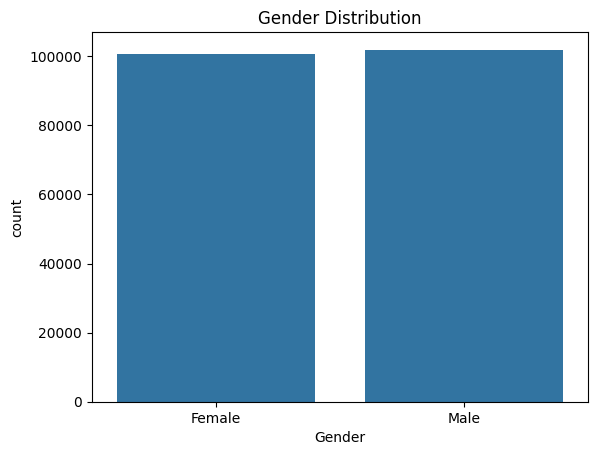

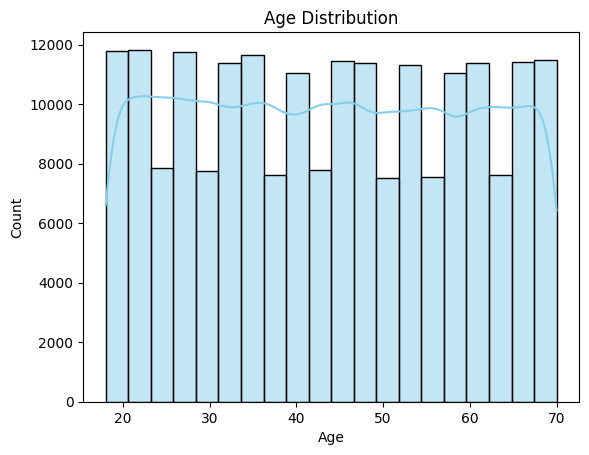

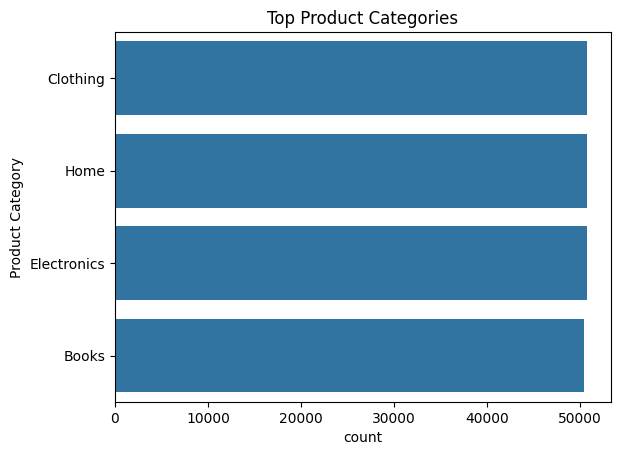

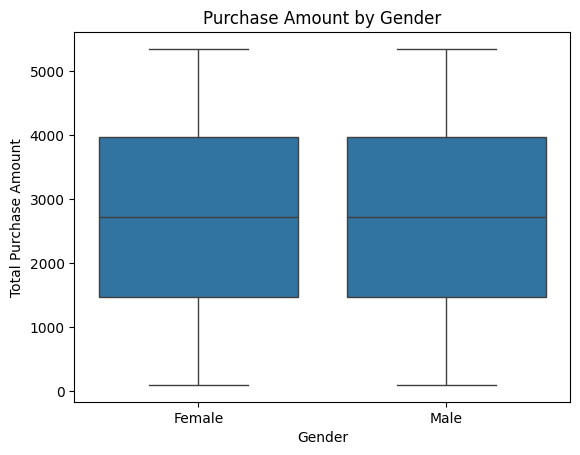

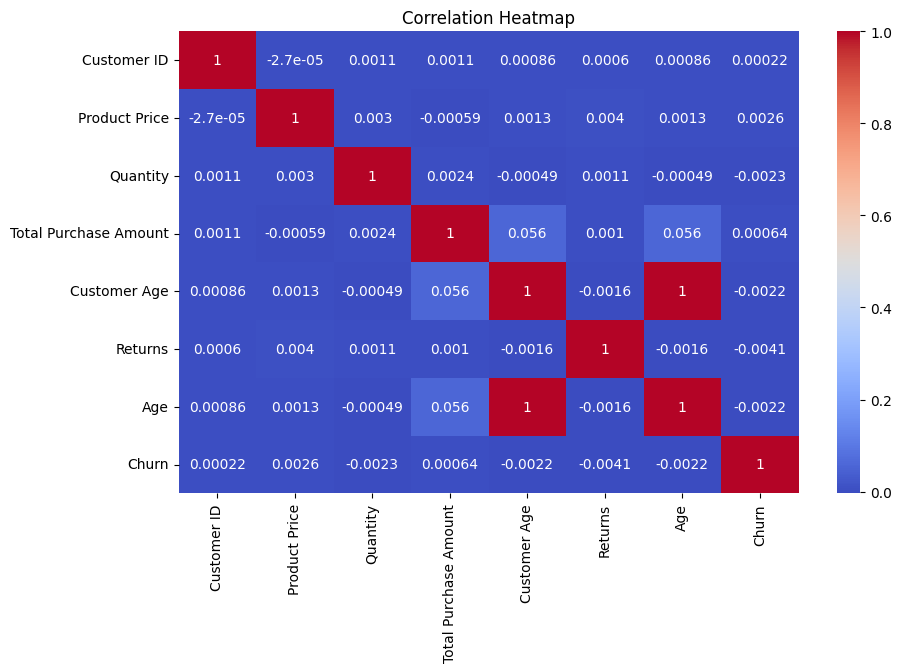

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()


sns.countplot(y='Product Category', data=df, order=df['Product Category'].value_counts().index)
plt.title("Top Product Categories")
plt.show()


sns.boxplot(x='Gender', y='Total Purchase Amount', data=df)
plt.title("Purchase Amount by Gender")
plt.show()


plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## E-commerce Customer Data Analysis

This notebook analyzes e-commerce customer data to understand customer behavior and identify potential factors influencing churn.

**1. Data Loading and Initial Inspection:**

- The dataset `ecommerce_customer_data_large.csv` is loaded into a pandas DataFrame.
- `df.info()` is used to display information about the DataFrame, including the number of rows, columns, data types, and non-null values.
- `df.head()` shows the first few rows of the dataset.

**Observations:**

- The dataset contains 250,000 entries and 13 columns.
- Columns include customer details, purchase information, and a 'Churn' indicator.
- The 'Returns' column has missing values.
- 'Purchase Date' is currently an object type and needs to be converted to datetime.
- 'Total Purchase Amount' is an integer type and can be converted to numeric.

**2. Data Cleaning:**

- `df.isnull().sum()` is used to count the number of missing values in each column.
- Rows with missing values in the 'Returns' column are dropped using `df.dropna()`.
- Duplicate rows are removed using `df.drop_duplicates()`.
- The 'Purchase Date' column is converted to datetime objects using `pd.to_datetime()` with `errors='coerce'` to handle any parsing issues.
- The 'Total Purchase Amount' column is converted to numeric using `pd.to_numeric()` with `errors='coerce'`.

**Observations:**

- Missing values in 'Returns' were handled by dropping rows.
- Duplicate entries were removed.
- 'Purchase Date' and 'Total Purchase Amount' were converted to appropriate data types.

**3. Exploratory Data Analysis (EDA):**

- Basic statistics and value counts are calculated for key columns:
    - `df['Gender'].value_counts()` shows the distribution of genders.
    - `df['Age'].describe()` provides descriptive statistics for customer age.
    - `df['Product Category'].value_counts()` shows the frequency of purchases by product category.
    - `df['Churn'].mean() * 100` calculates the churn rate.

**Observations:**

- The dataset has a similar number of male and female customers.
- The average customer age is around 44, with a wide range from 18 to 70.
- Clothing, Home, Electronics, and Books are the most popular product categories, with similar purchase frequencies.
- The churn rate is approximately 20.1%.

**4. Data Visualization:**

- Several plots are generated to visualize the data:
    - A countplot shows the distribution of genders.
    - A histogram shows the distribution of customer ages.
    - A countplot shows the distribution of product categories.
    - A boxplot shows the relationship between gender and total purchase amount.
    - A heatmap visualizes the correlation between numerical columns.

**Observations:**

- The visualizations confirm the balanced gender distribution and the spread of customer ages.
- The product category distribution is relatively uniform.
- The boxplot suggests no significant difference in total purchase amount between genders.
- The correlation heatmap shows a strong positive correlation between 'Product Price', 'Quantity', and 'Total Purchase Amount', which is expected. Other correlations appear to be weak.

**Summary:**

This analysis provides an initial understanding of the e-commerce customer data. Key findings include the distribution of customer demographics and purchase behavior, as well as the overall churn rate. Further analysis could explore the factors influencing churn and investigate relationships between different variables in more detail.

In [8]:
df.to_csv("cleaned_large_customer_data.csv", index=False)

from google.colab import files
files.download("cleaned_large_customer_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>